<a href="https://colab.research.google.com/github/Akshatpattiwar512/Exploratory-Data-Analysis/blob/main/Bestseller_books_with_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [96]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [97]:
print(df.Name)

0                          10-Day Green Smoothie Cleanse
1                                      11/22/63: A Novel
2                12 Rules for Life: An Antidote to Chaos
3                                 1984 (Signet Classics)
4      5,000 Awesome Facts (About Everything!) (Natio...
                             ...                        
545         Wrecking Ball (Diary of a Wimpy Kid Book 14)
546    You Are a Badass: How to Stop Doubting Your Gr...
547    You Are a Badass: How to Stop Doubting Your Gr...
548    You Are a Badass: How to Stop Doubting Your Gr...
549    You Are a Badass: How to Stop Doubting Your Gr...
Name: Name, Length: 550, dtype: object


In [98]:
df['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                                       10
StrengthsFinder 2.0                                                                                              9
Oh, the Places You'll Go!                                                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                                     7
The Very Hungry Caterpillar                                                                                      7
                                                                                                                ..
Super Freakonomics: Global Cooling, Patriotic Prostitutes, and Why Suicide Bombers Should Buy Life Insurance     1
Killing Reagan: The Violent Assault That Changed a Presidency (Bill O'Reilly's Killing Series)                   1
Alexander Hamilton                                                              

In [99]:
df_filtered=df.drop_duplicates(subset='Name',keep = 'last',inplace = False)
df_filtered.shape

(351, 7)

In [100]:
df.sort_values('User Rating',ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
...,...,...,...,...,...,...,...
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
107,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


In [101]:
df[['User Rating','Author','Name']].groupby(by=['Author','Name']).mean().sort_values(by=['User Rating'],ascending=False).head(10)

,,User Rating
Author,Name,
J. K. Rowling,"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9
Dav Pilkey,Dog Man: A Tale of Two Kitties: From the Creator of Captain Underpants (Dog Man #3),4.9
J.K. Rowling,"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9
Brandon Stanton,Humans of New York : Stories,4.9
J.K. Rowling,"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9
Bill Martin Jr.,"Brown Bear, Brown Bear, What Do You See?",4.9
Emily Winfield Martin,The Wonderful Things You Will Be,4.9
J.K. Rowling,"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9
Rush Limbaugh,Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),4.9


In [102]:
df[['Author','User Rating']].groupby(by='Author').mean().sort_values(by='User Rating',ascending=False).head(10)

,User Rating
Author,
Jill Twiss,4.9
Nathan W. Pyle,4.9
Chip Gaines,4.9
Rush Limbaugh,4.9
Bill Martin Jr.,4.9
Emily Winfield Martin,4.9
Pete Souza,4.9
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9


In [103]:
df[['Name','User Rating','Year']].groupby(by='Name').mean().sort_values(by='User Rating',ascending=False).head(10)

,User Rating,Year
Name,,
Hamilton: The Revolution,4.9,2016.0
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2),4.9,2014.0
"Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)",4.9,2016.0
"Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)",4.9,2017.0
"Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)",4.9,2019.0
"Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)",4.9,2016.0
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6),4.9,2018.5
"Brown Bear, Brown Bear, What Do You See?",4.9,2018.0
Rush Revere and the Brave Pilgrims: Time-Travel Adventures with Exceptional Americans (1),4.9,2013.0


In [104]:
dt_object = pd.to_datetime(df.Year,format='%Y')
df2 =df
df2['date'] = dt_object
df2 = df2.set_index("date")
df2

,Name,Author,User Rating,Reviews,Price,Year,Genre
date,,,,,,,
2016-01-01,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2011-01-01,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2018-01-01,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
2017-01-01,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
2019-01-01,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
2019-01-01,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
2016-01-01,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
2017-01-01,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction


In [105]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [106]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_fic= []
for i in year:
    fic = df[(df["Year"] == i) & (df["Genre"] == "Fiction")]
    num_fic.append(len(fic))
df_fict = pd.DataFrame({"Year": year,"numberofFiction": num_fic})
df_fict.head()

,Year,numberofFiction
0,2009,24
1,2010,20
2,2011,21
3,2012,21
4,2013,24


In [107]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_nonfic= []
for i in year:
    nonfic = df[(df["Year"] == i) & (df["Genre"] == "Non Fiction")]
    num_nonfic.append(len(nonfic))
df_nonfict = pd.DataFrame({"Year": year,"numberofNonFiction": num_nonfic})
df_nonfict.head()

,Year,numberofNonFiction
0,2009,26
1,2010,30
2,2011,29
3,2012,29
4,2013,26


In [108]:
df_nonfict["numberofFiction"] = df_fict["numberofFiction"]
df_nonfict.head()

,Year,numberofNonFiction,numberofFiction
0,2009,26,24
1,2010,30,20
2,2011,29,21
3,2012,29,21
4,2013,26,24


In [109]:
df_genre = df_nonfict.copy()


In [110]:
threshold = sum(df.Price)/len(df.Price)
print("threshold",threshold)
df["Price_level"] = ["high" if i > threshold else "low" for i in df.Price]
df.loc[:15,["Price_level","Price"]] 

threshold 13.1


,Price_level,Price
0,low,8
1,high,22
2,high,15
3,low,6
4,low,12
5,low,11
6,high,30
7,high,15
8,low,3
9,low,8


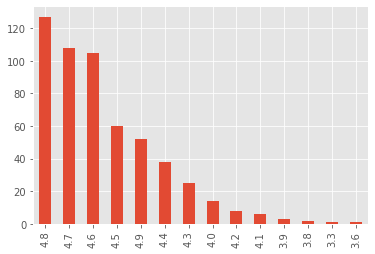

In [111]:
y = df["User Rating"].value_counts()
y.plot(kind="bar")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



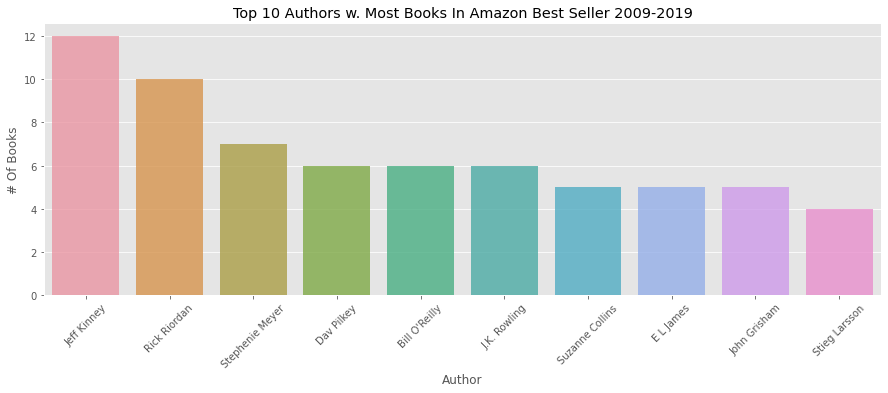

In [112]:
top10 = df_filtered.value_counts('Author')
top10 = top10[:10,]
plt.figure(figsize=(15,5))
sns.barplot(top10.index, top10.values, alpha=0.8)
plt.xticks(rotation=45)
plt.title('Top 10 Authors w. Most Books In Amazon Best Seller 2009-2019')
plt.ylabel('# Of Books')
plt.show()

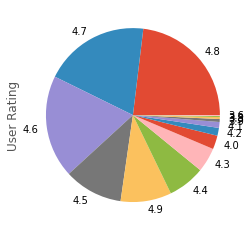

In [113]:
y = df["User Rating"].value_counts()
y.plot(kind="pie")

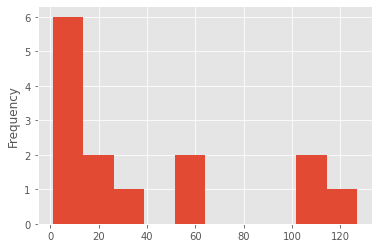

In [114]:
y = df["User Rating"].value_counts()
y.plot(kind="hist")

In [115]:
px.scatter(df['Author'],df['User Rating'])

In [116]:
fig = px.histogram(df, x="User Rating",labels={'':'The Number of Books'},title="User Rating Histogram")
fig.show()

In [117]:
px.bar(df,x='Year',y='User Rating',  color='Genre', barmode='group', title="User Rating by Year by Genre")

In [118]:
px.bar(df, x='Genre')

In [119]:
px.scatter_matrix(df,dimensions=['Reviews','User Rating'],color='Genre', title='Relationship between Reviews & User Rating')

In [120]:
df['Name_len']=df['Name'].str.len()

In [121]:
px.scatter_matrix(df,dimensions=['Price','User Rating'],color='Genre',size='Name_len')

In [122]:
px.bar(df,x='User Rating',y='Price')

In [123]:
px.bar(df, x='User Rating',y='Price',color='Genre' ,facet_row='Genre',facet_col='Year')

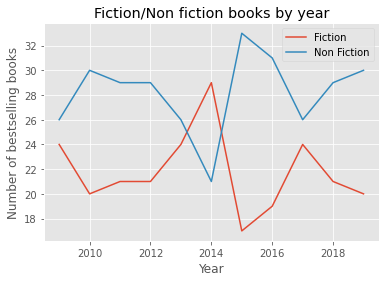

In [124]:
yearfiction = df.groupby(['Year','Genre']).size()

plt.title('Fiction/Non fiction books by year')
plt.plot(range(2009,2020),yearfiction.values[0:-1:2],label='Fiction')
plt.plot(range(2009,2020),yearfiction.values[1::2],label='Non Fiction')
plt.xlabel('Year')
plt.ylabel('Number of bestselling books')
plt.legend()
plt.show()

In [125]:
px.scatter(df.sort_values(by='Year'),x='User Rating',y='Price', animation_frame='Year', color='Genre',size='Name_len', 
title="Over all book Rating & Price by every year")

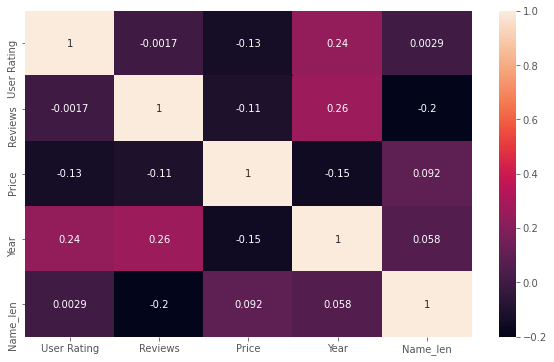

In [126]:
correlation = df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(correlation,annot=True)
plt.show()

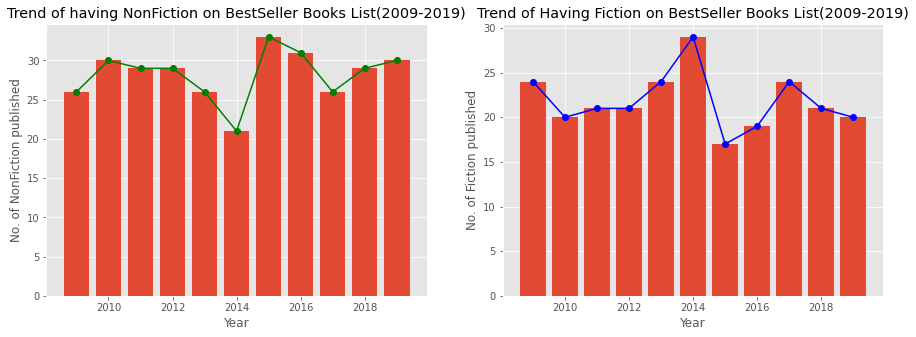

In [127]:
plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x = df_genre["Year"],height=df_genre["numberofNonFiction"],)
plt.plot(df_genre["Year"],df_genre["numberofNonFiction"],"go-")
#plt.plot(df_genre["Year"],df_genre["numberofFiction"],"bo-")
plt.title("Trend of having NonFiction on BestSeller Books List(2009-2019)")
plt.xlabel("Year")
plt.ylabel("No. of NonFiction published")

plt.subplot(1,2,2)
plt.bar(x = df_genre["Year"],height=df_genre["numberofFiction"],)
plt.plot(df_genre["Year"],df_genre["numberofFiction"],"bo-")
plt.title("Trend of Having Fiction on BestSeller Books List(2009-2019)")
plt.xlabel("Year")
plt.ylabel("No. of Fiction published")
plt.show()


In [128]:
genre_reviews = df_filtered.groupby("Genre")["Reviews"].sum()

In [129]:
all_author=df_filtered.value_counts('Author')
author_index=all_author.index
all_qty=all_author.values

In [130]:
a=np.zeros(len(all_author))
S=np.zeros(len(all_author))
w_rating=np.zeros(len(all_author))

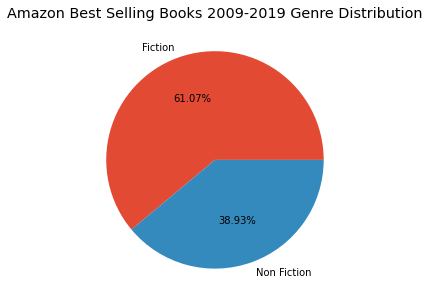

In [131]:
fig=plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
plt.pie(genre_reviews,labels=genre_reviews.index, autopct='%1.2f%%')
plt.title('Amazon Best Selling Books 2009-2019 Genre Distribution')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



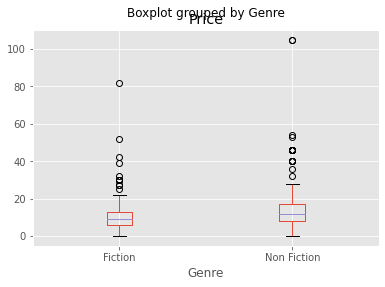

In [132]:
df.boxplot(column='Price',by = 'Genre')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



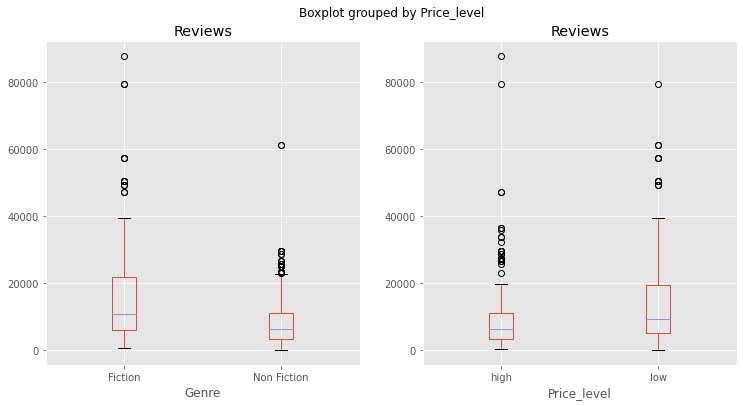

In [133]:
fig,axs = plt.subplots(1,2, figsize = (12,6))
fig.suptitle('Reviews grouped by genre and price threshold')
df.boxplot(column = 'Reviews', by = 'Genre', ax = axs[0])
df.boxplot(column = 'Reviews', by = 'Price_level', ax = axs[1])
plt.show()

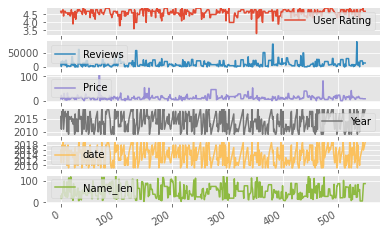

In [134]:
df.plot(subplots = True)
plt.show()

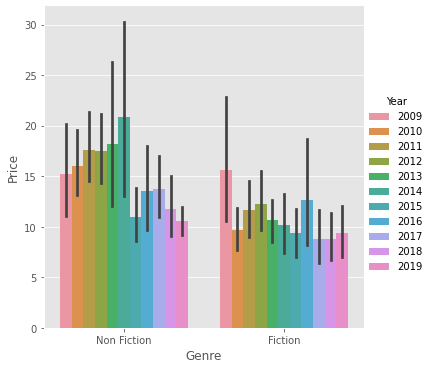

In [135]:
sns.catplot(x = "Genre", y= "Price",hue="Year", kind="bar", data=df)

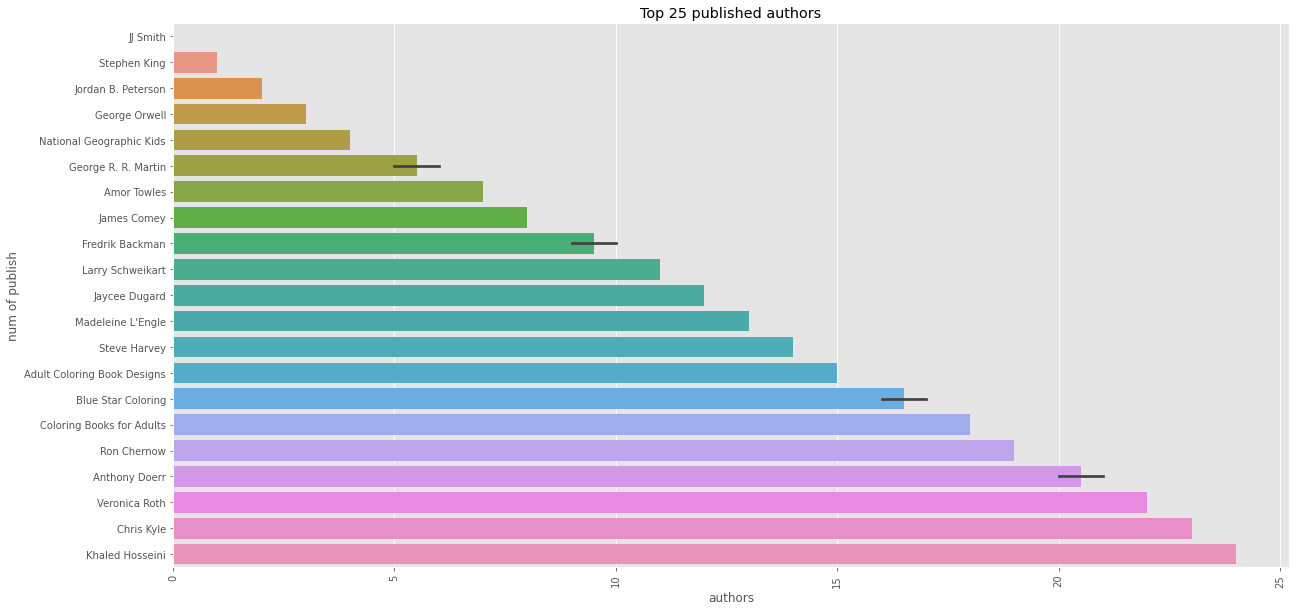

In [141]:
authors = df["Author"]
authors = authors[0:25]
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.ylabel("num of publish")
plt.xlabel("authors")
plt.title("Top 25 published authors")
sns.barplot(x=authors.index, y=authors.values)